In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.ensemble import BaggingRegressor,BaggingClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, \
accuracy_score, precision_score, confusion_matrix, mean_squared_error, r2_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
import time as time
from imblearn.over_sampling import SMOTE



In [5]:
#import data
X_test = pd.read_csv('X_test_stratified.csv')
X_train = pd.read_csv('X_train_stratified.csv')
y_test = pd.read_csv('y_test_stratified.csv')
y_train = pd.read_csv('y_train_stratified.csv')



## Random Forest

### INITAL

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Create a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the training sets
rf.fit(X_train, y_train.values.ravel())

# Predict the response for the test dataset
y_pred = rf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed report of classification done by the model
print(classification_report(y_test, y_pred))

Accuracy: 0.6795918367346939
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.70      0.21      0.33        33
           5       0.71      0.66      0.69       291
           6       0.64      0.82      0.72       440
           7       0.72      0.49      0.58       176
           8       0.95      0.54      0.69        35
           9       0.00      0.00      0.00         1

    accuracy                           0.68       980
   macro avg       0.53      0.39      0.43       980
weighted avg       0.69      0.68      0.67       980



/Users/diegoschummer/anaconda3/envs/hw_2/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/diegoschummer/anaconda3/envs/hw_2/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/diegoschummer/anaconda3/envs/hw_2/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

### Tuning


In the parameter grid, I've added 'class_weight' to handle the class imbalance. It adjusts the cost function to give more weight to under-represented classes and less weight to over-represented ones. 'balanced' and 'balanced_subsample' automatically adjust weights inversely proportional to class frequencies. The 'None' option is added to compare the performance with and without class weighting.

In [ ]:
### Tuning

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'class_weight' : ['balanced', 'balanced_subsample', None]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=2, scoring='accuracy')

# Fit the GridSearch to our training data
grid_search.fit(X_train, y_train.values.ravel())

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Create a new Random Forest classifier with the best parameters
rf_best = RandomForestClassifier(**grid_search.best_params_, random_state=42)

# Fit the model on the training data
rf_best.fit(X_train, y_train.values.ravel())

# Predict the labels of the test set
y_pred = rf_best.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))


Best parameters:  {'class_weight': None, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score:  0.6360387953037264
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.64      0.21      0.32        33
           5       0.71      0.67      0.69       291
           6       0.64      0.80      0.71       440
           7       0.69      0.48      0.57       176
           8       1.00      0.57      0.73        35
           9       0.00      0.00      0.00         1

    accuracy                           0.67       980
   macro avg       0.52      0.39      0.43       980
weighted avg       0.68      0.67      0.66       980

[[  0   0   1   3   0   0   0]
 [  0   7  17   9   0   0   0]
 [  0   3 194  93   1   0   0]
 [  0   1  58 352  29   0   0]
 [  0   0   4  88  84   0   0]
 [  0   0   1   8   6  20   0]
 [  0   0   0   0   1   0   0]]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
#print df w feautre importance
feature_importances = pd.DataFrame(rf_best.feature_importances_,
                                      index = X_train.columns,                          
                                        columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)


                      importance
alcohol                 0.123887
density                 0.108356
volatile acidity        0.099992
free sulfur dioxide     0.098937
residual sugar          0.086279
total sulfur dioxide    0.086088
pH                      0.082675
chlorides               0.082636
citric acid             0.080666
fixed acidity           0.076876
sulphates               0.073607


- Class 6: Similar to class 5, the precision and recall are around 0.60. This class seems to be the best predicted by the model.
- The accuracy of the model is 0.56 or 56%, which is the proportion of true results (both true positives and true negatives) in the population.
- the model is performing decently for classes 5, 6, and 7 but poorly for the other classes.

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create a new Random Forest classifier with the best parameters
rf_best = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=20, min_samples_leaf=1,
                                 min_samples_split=2, class_weight=None, random_state=42)

# Fit the model on the training data
rf_best.fit(X_train, y_train.values.ravel())

# Predict the labels of the test set
y_pred = rf_best.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.64      0.21      0.32        33
           5       0.71      0.67      0.69       291
           6       0.64      0.80      0.71       440
           7       0.69      0.48      0.57       176
           8       1.00      0.57      0.73        35
           9       0.00      0.00      0.00         1

    accuracy                           0.67       980
   macro avg       0.52      0.39      0.43       980
weighted avg       0.68      0.67      0.66       980

[[  0   0   1   3   0   0   0]
 [  0   7  17   9   0   0   0]
 [  0   3 194  93   1   0   0]
 [  0   1  58 352  29   0   0]
 [  0   0   4  88  84   0   0]
 [  0   0   1   8   6  20   0]
 [  0   0   0   0   1   0   0]]


/Users/diegoschummer/anaconda3/envs/hw_2/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/diegoschummer/anaconda3/envs/hw_2/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/diegoschummer/anaconda3/envs/hw_2/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

In [8]:
#comapre to base model
from sklearn.metrics import classification_report, confusion_matrix

#create base model
rf_base = RandomForestClassifier(n_estimators=100, random_state=42)

#fit base model
rf_base.fit(X_train, y_train.values.ravel())

#predict base model
y_pred = rf_base.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.70      0.21      0.33        33
           5       0.71      0.66      0.69       291
           6       0.64      0.82      0.72       440
           7       0.72      0.49      0.58       176
           8       0.95      0.54      0.69        35
           9       0.00      0.00      0.00         1

    accuracy                           0.68       980
   macro avg       0.53      0.39      0.43       980
weighted avg       0.69      0.68      0.67       980



/Users/diegoschummer/anaconda3/envs/hw_2/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/diegoschummer/anaconda3/envs/hw_2/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/diegoschummer/anaconda3/envs/hw_2/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

In [ ]:
# #new parameter tuning

# param_grid = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [None, 5, 10, 15],
#     'min_samples_split': [2, 5, 10, 15],
#     'min_samples_leaf': [1, 2, 5, 10],
#     'class_weight': [None, 'balanced']
# }

# # Create a GridSearchCV object
# grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=2, scoring='accuracy')


In [ ]:

# # Fit the GridSearch to our training data
# grid_search.fit(X_train, y_train.values.ravel())

# print("Best parameters: ", grid_search.best_params_)

# print("Best score: ", grid_search.best_score_)



Best parameters:  {'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score:  0.6345074017355794


In [10]:
best_parameters = {'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
#Best score:  0.6345074017355794


In [11]:
#fit model
rf_best = RandomForestClassifier(**best_parameters, random_state=42)

#fit model
rf_best.fit(X_train, y_train.values.ravel())

#predict model
y_pred = rf_best.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.67      0.24      0.36        33
           5       0.69      0.64      0.66       291
           6       0.62      0.79      0.69       440
           7       0.68      0.47      0.55       176
           8       1.00      0.54      0.70        35
           9       0.00      0.00      0.00         1

    accuracy                           0.66       980
   macro avg       0.52      0.38      0.42       980
weighted avg       0.66      0.66      0.65       980



/Users/diegoschummer/anaconda3/envs/hw_2/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/diegoschummer/anaconda3/envs/hw_2/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/diegoschummer/anaconda3/envs/hw_2/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

THe base model, rf_base has a better balance of precision, recall, and F1-score for most classes, as well as the highest overall accuracy.

In [42]:
#PRIMT MODEL eq Best parameters:  {'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
print("RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None, min_samples_leaf=1, min_samples_split=2, class_weight=None, random_state=42)")

RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None, min_samples_leaf=1, min_samples_split=2, class_weight=None, random_state=42)


In [12]:
#get accuracy on test set
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.6551020408163265


In [13]:
#Bagging the results of 10 decision trees to predict car price
model = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=3), n_estimators=10, random_state=1,
                        n_jobs=-1).fit(X_train, y_train.values.ravel())

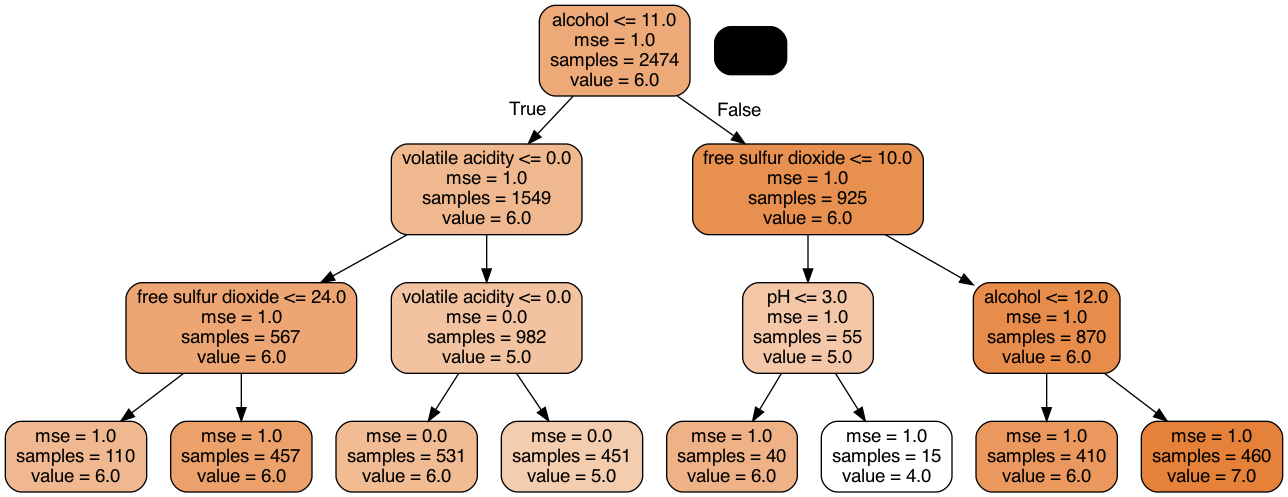

In [16]:
#Change the index of model.estimators_[index] to visualize the 10 bagged trees, one at a time
from io import StringIO
import pydotplus

from sklearn.tree import export_graphviz
from IPython.display import Image  


dot_data = StringIO()
export_graphviz(model.estimators_[0], out_file=dot_data,  
                filled=True, rounded=True,
                feature_names = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"] ,precision=0)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('car_price_tree.png')
Image(graph.create_png())

In [17]:
#Feature importance can be found by averaging the feature importance in individual trees
import numpy as np
import matplotlib.pyplot as plt

# Get numerical feature importances
importances = list(rf_best.feature_importances_)
feature_list = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: alcohol              Importance: 0.12
Variable: density              Importance: 0.11
Variable: volatile acidity     Importance: 0.1
Variable: free sulfur dioxide  Importance: 0.1
Variable: residual sugar       Importance: 0.09
Variable: total sulfur dioxide Importance: 0.09
Variable: fixed acidity        Importance: 0.08
Variable: citric acid          Importance: 0.08
Variable: chlorides            Importance: 0.08
Variable: pH                   Importance: 0.08
Variable: sulphates            Importance: 0.07


In [50]:
#plot r^2 vs number of trees
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#Tuning the random forest parameters
start_time = time.time()

oob_score = {}

i=0
for pr in range(1,12):
    model = RandomForestClassifier(random_state=1,oob_score=True,verbose=False,n_estimators = 500,
                                  max_features=pr, n_jobs=-1).fit(X_train,y_train.values.ravel())
    oob_score[i] = model.oob_score_
    i=i+1
    
end_time = time.time()
print("time taken = ", (end_time-start_time)/60, " minutes")
print("max accuracy = ", np.max(list(oob_score.values())))
print("Best value of max_features= ", np.argmax(list(oob_score.values()))+1)


time taken =  0.2662697990735372  minutes
max accuracy =  0.6975497702909648
Best value of max_features=  2


In [ ]:
#Model with optimal parameters
model = RandomForestClassifier(n_estimators=300, random_state=1,
                        n_jobs=-1, max_features=2).fit(X, y)
np.sqrt(mean_squared_error(test.price, model.predict(Xtest)))

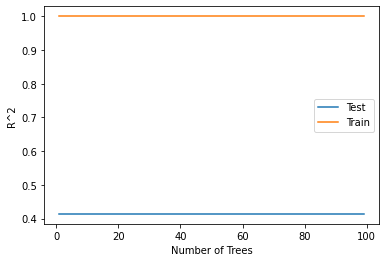

In [ ]:
#plot 
plt.plot(range(1, 100), test_score, label='Test')
plt.plot(range(1, 100), train_score, label='Train')

plt.xlabel('Number of Trees')
plt.ylabel('R^2')

plt.legend()
plt.show()


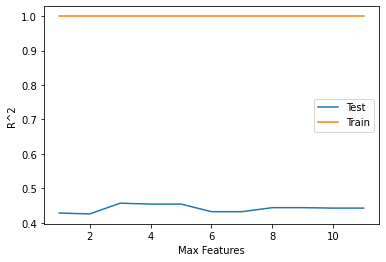

In [44]:
#plot max features vs accuracy
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#initialize lists to store values
test_score = []
train_score = []

#iterate over number of trees for classsifer
for i in range(1, 12):
    rf = RandomForestClassifier(n_estimators=100, max_features=i, random_state=42)
    rf.fit(X_train, y_train.values.ravel())
    y_pred = rf.predict(X_test)
    test_score.append(r2_score(y_test, y_pred))
    train_score.append(rf.score(X_train, y_train))

#plot
plt.plot(range(1, 12), test_score, label='Test')
plt.plot(range(1, 12), train_score, label='Train')

plt.xlabel('Max Features')
plt.ylabel('R^2')

plt.legend()
plt.show()


In [51]:
#{'class_weight': None, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, max_features = 2}

model_final = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=20, min_samples_leaf=1, min_samples_split=2, class_weight=None, random_state=42, max_features = 2)

#fit model
model_final.fit(X_train, y_train.values.ravel())

#predict model
y_pred = model_final.predict(X_test)


In [52]:
#get classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.69      0.27      0.39        33
           5       0.71      0.65      0.68       291
           6       0.64      0.81      0.71       440
           7       0.70      0.50      0.58       176
           8       1.00      0.54      0.70        35
           9       0.00      0.00      0.00         1

    accuracy                           0.67       980
   macro avg       0.53      0.40      0.44       980
weighted avg       0.68      0.67      0.66       980



/Users/diegoschummer/anaconda3/envs/hw_2/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/diegoschummer/anaconda3/envs/hw_2/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/diegoschummer/anaconda3/envs/hw_2/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

In [57]:
#feature_importances = pd.DataFrame(rf_best.feature_importances_,
                                      #index = X_train.columns,                          
                                      #  columns=['importance']).sort_values('importance', ascending=False)

#feature_importances

feature_importances = pd.DataFrame(model_final.feature_importances_,
                                      index = X_train.columns,
                                        columns=['importance']).sort_values('importance', ascending=False)


feature_importances

,importance
alcohol,0.123329
density,0.105006
volatile acidity,0.097794
free sulfur dioxide,0.095703
total sulfur dioxide,0.089031
residual sugar,0.087930
chlorides,0.084987
pH,0.082859
citric acid,0.080445
fixed acidity,0.077518
